(sec:random)=
# 7. Osnove naključnih procesov

Dinamične obremenitve pogosto niso deterministične, ampak imajo lahko v celoti ali delno naključne lastnosti. Primer naključnih obremenitev predstavljajo obremenitve zaradi morskih valov ali hrapavosti ceste. Take obremenitve je treba obravnavati kot **naključne procese**. V tem poglavju si bomo pogledali, kako naključne obremenitve obravnavamo ter jih potem uspešno uporabimo pri dinamskih sistemih.

Naključni podatki se razlikujejo od determinističnih podatkov, saj jih ni mogoče natančno predvideti. Vendar pa lahko s pomočjo analize segmentov naključnih podatkov razberemo določene značilnosti. Na primer, če merimo hrapavost površine enega segmenta, lahko na podlagi tega z določeno verjetnostjo sklepamo o hrapavosti drugih segmentov. Pri opisu naključnih procesov se pogosto uporablja predpostavka o porazdelitvi procesa, kot je na primer normalna porazdelitev.

Čeprav je mogoče naključni proces analizirati v časovni domeni, pri uporabi takšnega pristopa obstajajo določene pomanjkljivosti. Za ustrezno oceno procesa je treba zbrati dovolj veliko število vzorčnih meritev (ali opazovanj) v časovni domeni, ki jih nato analiziramo kot skupino (ansambel ali *ensemble*). Kot bomo videli kasneje, pa je analiza strukturne dinamike in naključnih procesov v frekvenčni domeni bistveno elegantnejša.

Priporočamo vam, da si ogledate nekatera referenčna besedila, ki se poglobljeno ukvarjajo z naključnimi procesi:

* {cite:t}`bendat_2011`, 
* {cite:t}`newland_1993` in 
* {cite:t}`shin2008`. 

Nekatere vsebine v tem besedilu so povzete po knjigi {cite:t}`slavic2020VF`.

## Kaj je naključni proces?

Naključni proces je definiran s kombinacijo **funkcije gostote verjetnosti** (ang. *Probability Density Function* $-$ PDF) in **spektralno gostoto moči** (ang. *Power Spectral Density* $-$ PSD).

Slika spodaj prikazuje ansambel $\left\{x_k(t)\right\}$ vzorčnih funkcij (opazovanj) $x_k(t)$, pri čemer je vsako opazovanje $k$ sestavljeno iz naključne spremenljivke v času $t_i$: $x_k(t_i)$. Kot bo podrobneje obravnavano kasneje, predpostavki o stacionarnosti in ergodičnosti bistveno poenostavita analizo naključnih podatkov.

![random_ensemble](./images/random_ensemble.svg)

## Normalna porazdelitev (Gaussov proces)

Gaussova porazdelitev je pogosto opažena pri različnih fizikalnih pojavih, njeno razširjenost pa pojasnjuje centralni limitni teorem ({ref}`sec:centralni_limitni_teorem`). 

Funkcija gostote verjetnosti (PDF) $p(x)$ za naključni proces $\left\{x(t_i)\right\}$  definira ob času $t$ verjetnost amplitude $x$; za Gaussov proces je PDF definirana kot:

$$
p(x) = \frac{1}{\sigma \, \sqrt{2 \, \pi}} \, \mathrm{e}^{-\frac{(x-\mu)^2}{2 \,\sigma^2}},
$$

kjer je $\mu$ povprečna vrednost, $\sigma$ pa standardni odklon (deviacija) oziroma $\sigma^2$ varianca.
Srednja vrednost $\mu$ in varianca $\sigma^2$ določata obliko PDF in se pogosto imenujeta prvi moment in drugi centralni moment; izračunamo ju s pomočjo funkcije gostote verjetnosti:


$$
\mu = \int_{-\infty}^{+\infty} x \, p(x)\, \textrm{d} x,
$$

$$
\sigma^2 = \int_{-\infty}^{+\infty} (x - \mu)^2 \, p(x)\, \textrm{d} x.
$$

Primer različnih normalnih porazdelitev prikazuje slika spodaj.

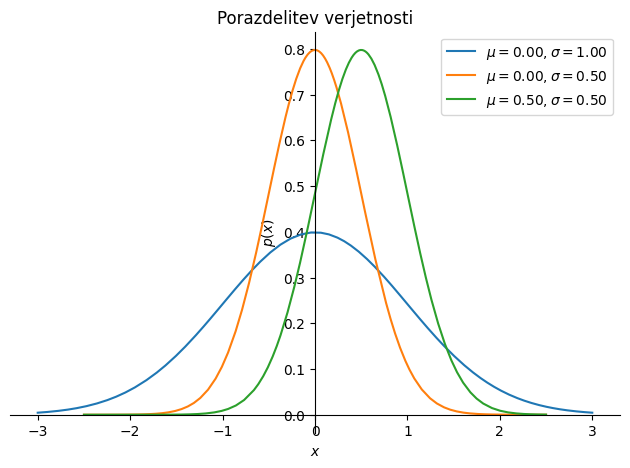

In [1]:
import sympy as sym
σ, μ, x, = sym.symbols('\\sigma, \\mu, x', real=True)
π = sym.pi

p = 1/(σ*sym.sqrt(2*π)) * sym.exp(-(x-μ)**2/(2*σ**2))

podatki = {σ: 1., μ: 0.}

p1 = sym.plot(p.subs(podatki), (x, -3*σ.subs(podatki), +3*σ.subs(podatki)), line_color='C0', 
              label=f'$\\mu={μ.subs(podatki):3.2f}, \\sigma={σ.subs(podatki):3.2f}$', show=False, 
              title='Porazdelitev verjetnosti', ylabel='$p(x)$', xlabel='$x$')

podatki = {σ: 0.5, μ: 0.}
p2 = sym.plot(p.subs(podatki), (x, -5*σ.subs(podatki), +5*σ.subs(podatki)), line_color='C1', 
              label=f'$\\mu={μ.subs(podatki):3.2f}, \\sigma={σ.subs(podatki):3.2f}$', show=False)
podatki = {σ: 0.5, μ: 0.5}
p3 = sym.plot(p.subs(podatki), (x, -5*σ.subs(podatki), +5*σ.subs(podatki)), line_color='C2', 
              label=f'$\\mu={μ.subs(podatki):3.2f}, \\sigma={σ.subs(podatki):3.2f}$', show=False)
p1.extend(p2)
p1.extend(p3)
p1.legend = True
p1.show()

S spodnjim izračunom lahko preverimo, da sta prvi moment in drugi centralni moment za Gaussovo/normalno porazdelitev dejansko $\mu$  in $\sigma^2$:

In [2]:
import sympy as sym
σ, μ, x, = sym.symbols('\\sigma, \\mu, x', real=True, positive=True)
π = sym.pi

p = 1/(σ*sym.sqrt(2*π)) * sym.exp(-(x-μ)**2/(2*σ**2))

m1 = sym.integrate(x*p, (x, -sym.oo, +sym.oo))
cm2 = sym.integrate((x-μ)**2 * p, (x, -sym.oo, +sym.oo))

m1

\mu

In [3]:
cm2

\sigma**2

Spodaj je še primer numeričnega generiranja normalne porazdelitve in primerjava s teoretično funkcijo gostote verjetnosti.

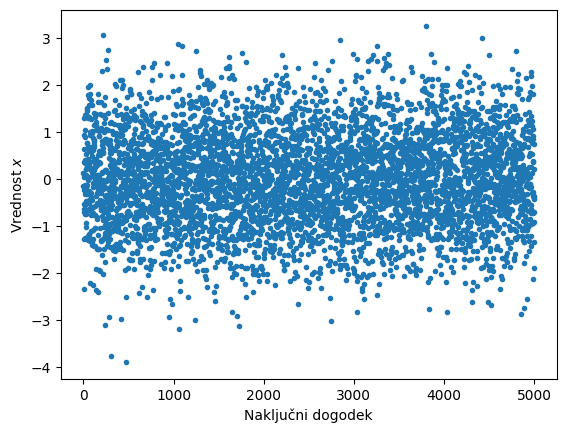

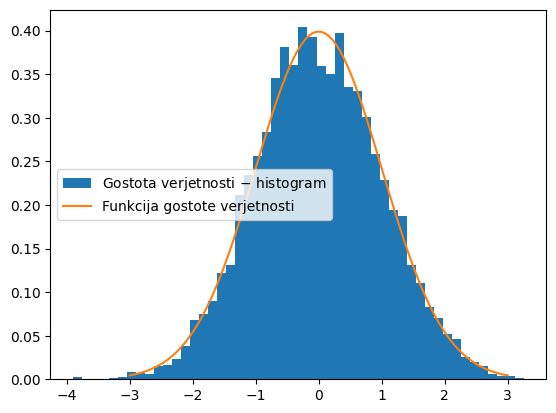

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import sympy as sym
σ, μ, x, = sym.symbols('\\sigma, \\mu, x', real=True, positive=True)
π = sym.pi

p = 1/(σ*sym.sqrt(2*π)) * sym.exp(-(x-μ)**2/(2*σ**2))
podatki = {σ: 1., μ: 0.}
pdf = sym.lambdify(x, p.subs(podatki))


rng = np.random.default_rng(0)
x = rng.normal(loc=podatki[μ], scale=podatki[σ], size=5000)
#x = rng.uniform(low=-1, high=1, size=5000) # enakomerna porazdelitev
plt.plot(x, '.')
plt.xlabel('Naključni dogodek')
plt.ylabel('Vrednost $x$')
plt.show()

plt.hist(x, bins=50, density=True, label='Gostota verjetnosti $-$ histogram')

x = np.linspace(-3*podatki[σ],3*podatki[σ], 100)
plt.plot(x, pdf(x), label='Funkcija gostote verjetnosti')
plt.legend()
plt.show()

(sec:centralni_limitni_teorem)=

### Centralni limitni teorem

Centralni limitni teorem trdi, da vsota neodvisnih naključnih spremenljivk sledi normalni porazdelitvi (ne glede na porazdelitev prvotnih spremenljivk), pod pogojem, da je velikost vzorca dovoljšna.

Spodnja koda demonstrira centralni limitni teorem (ang. *Central Limit Theorem $-$ CLT*) z uporabo enakomerno porazdeljenih naključnih spremenljivk. Koda ustvari `N = 10` vzorcev, pri čemer ima vsak vzorec `k = 5000` naključnih vrednosti, ki sledijo enakomerni porazdelitvi med 0 in 1. Nato izračuna vsoto prvih `n` vzorcev (`n = 1, 2, 5, 10`) in prikaže njihove verjetnostne porazdelitve s histogrami. Za vsak histogram je izračunana tudi teoretična normalna porazdelitev z uporabo povprečja in standardne deviacije vsote `n` vzorcev. Izkaže se, da vsota enakomerno porazdeljenih vzorcev konvergira v normalno porazdelitev.

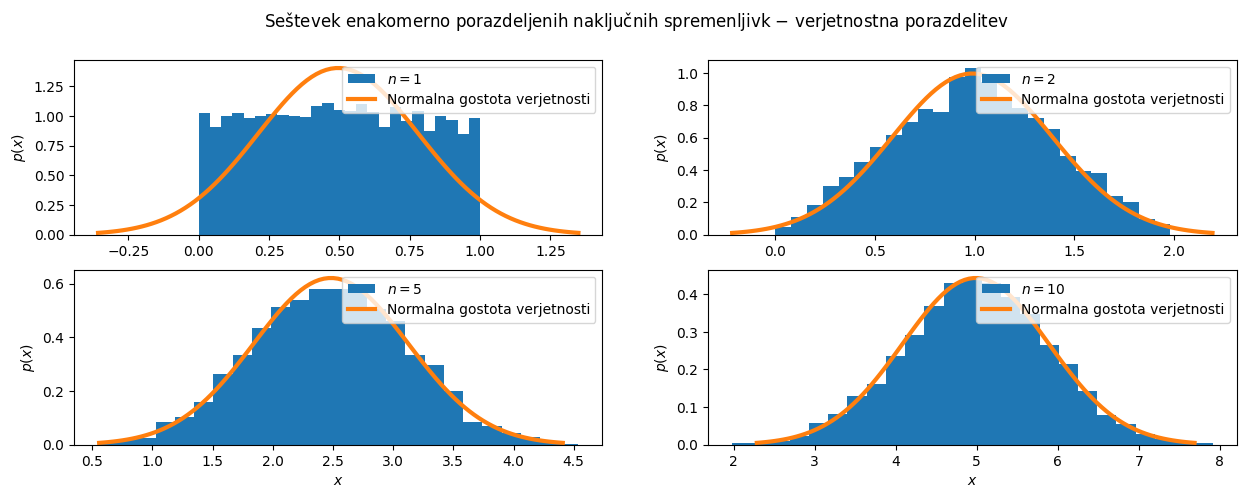

In [5]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

seed = 123
rng = np.random.default_rng(seed)
N = 10 # število naključnih vzorcev
k = 5000 # število naključnih vrednosti v vzorcu
data = [rng.uniform(low=0, high=1, size=k) for i in range(N)]

# seštevanje za n = 1, 2, 5 in 10
S1 = np.sum(data[:1], axis=0) # n = 1
S2 = np.sum(data[:2], axis=0) # n = 2
S5 = np.sum(data[:5], axis=0) # n = 5
S10 = np.sum(data[:10], axis=0) # n = 10

σ, μ, x, = sym.symbols('\\sigma, \\mu, x', real=True, positive=True)
π = sym.pi
p = 1/(σ*sym.sqrt(2*π)) * sym.exp(-(x-μ)**2/(2*σ**2)) # teoretična gostota verjetnosti

fig, axs = plt.subplots(2, 2, figsize=(15, 5))
fig.suptitle(r'Seštevek enakomerno porazdeljenih naključnih spremenljivk $-$ verjetnostna porazdelitev')
bins = 25 # število stolpcev za histogram

# graf za n = 1
axs[0, 0].hist(S1, bins=bins, density=True, label='$n=1$')
data = {σ: np.std(S1), μ: np.mean(S1)}
pdf = sym.lambdify(x, p.subs(data))
x_S1 = np.linspace(-3*data[σ]+data[μ], 3*data[σ]+data[μ], 100)
axs[0, 0].plot(x_S1, pdf(x_S1), lw=3, label='Normalna gostota verjetnosti')
axs[0, 0].set_ylabel('$p(x)$')
axs[0, 0].legend(loc='upper right')

# graf za n = 2
axs[0, 1].hist(S2, bins=bins, density=True, label='$n=2$')
data = {σ: np.std(S2), μ: np.mean(S2)}
pdf = sym.lambdify(x, p.subs(data))
x_S2 = np.linspace(-3*data[σ]+data[μ], 3*data[σ]+data[μ], 100)
axs[0, 1].plot(x_S2, pdf(x_S2), lw=3, label='Normalna gostota verjetnosti')
axs[0, 1].set_ylabel('$p(x)$')
axs[0, 1].legend(loc='upper right')

# graf za n = 5
axs[1, 0].hist(S5, bins=bins, density=True, label='$n=5$')
data = {σ: np.std(S5), μ: np.mean(S5)}
pdf = sym.lambdify(x, p.subs(data))
x_S5 = np.linspace(-3*data[σ]+data[μ],3*data[σ]+data[μ], 100)
axs[1,0].plot(x_S5, pdf(x_S5), lw=3, label='Normalna gostota verjetnosti')
axs[1,0].set_xlabel('$x$')
axs[1,0].set_ylabel('$p(x)$')
axs[1,0].legend(loc='upper right')

# graf za n = 10
axs[1,1].hist(S10, bins=bins, density=True, label='$n=10$');
data = {σ: np.std(S10), μ: np.mean(S10)}
pdf = sym.lambdify(x, p.subs(data))
x_S10 = np.linspace(-3*data[σ]+data[μ],3*data[σ]+data[μ], 100)
axs[1,1].plot(x_S10, pdf(x_S10), lw=3, label='Normalna gostota verjetnosti')
axs[1,1].set_xlabel('$x$')
axs[1,1].set_ylabel('$p(x)$')
axs[1,1].legend(loc='upper right');
plt.show()

Centralni limitni teorem tudi pravi, da se porazdelitev vzorca povprečij vsake naključne spremenljivke približuje normalni porazdelitvi, ko velikost vzorca narašča, tudi če je prvotna populacija porazdeljena drugače kot normalno. To drži, če so vzorci neodvisni in enako porazdeljeni ter je velikost vzorca dovoljšna.

Poglejmo si sedaj še zgled z drugačno porazdelitvijo: spremljali bomo eksponentno porazdeljen čas med prihodoma dveh študentov v učilnico. V kodi spodaj kreiramo zelo velik vzorec: `število_študentov = 100000` in opazimo, da večina študentov pride s časovno razliko manj kot 20 s. Naslednja slika prikazuje povprečja vzorcev, kjer smo začetne podatke razdelili v vzorce velikosti: `velikost_vzorca = 100`. Opazimo, da so povprečja normalno porazdeljena.

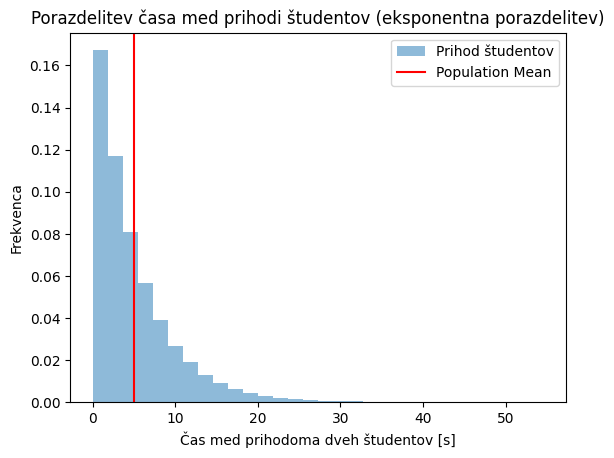

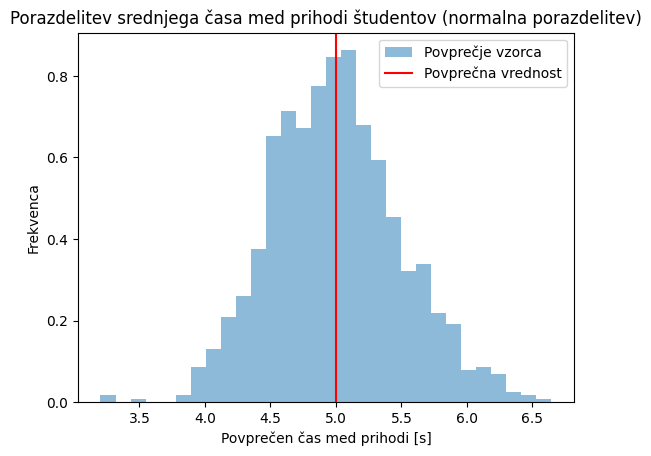

In [6]:
import numpy as np
import matplotlib.pyplot as plt

upad = 0.2
število_študentov = 100000

prihod_študentov = np.random.exponential(scale=1/upad, size=število_študentov)

plt.hist(prihod_študentov, bins=30, density=True, alpha=0.5, label='Prihod študentov')
plt.xlabel('Čas med prihodoma dveh študentov [s]')
plt.ylabel('Frekvenca')
plt.title('Porazdelitev časa med prihodi študentov (eksponentna porazdelitev)')
plt.axvline(x=1/upad, color='r', label='Population Mean')
plt.legend()
plt.show()


velikost_vzorca = 100
povprečja_vzorcev = np.mean(prihod_študentov.reshape((velikost_vzorca,-1)),axis=0)

plt.hist(povprečja_vzorcev, bins=30, density=True, alpha=0.5, label='Povprečje vzorca')
plt.xlabel('Povprečen čas med prihodi [s]')
plt.ylabel('Frekvenca')
plt.title('Porazdelitev srednjega časa med prihodi študentov (normalna porazdelitev)')
plt.axvline(x=1/upad, color='r', label='Povprečna vrednost')
plt.legend()
plt.show()

(sec:momenti_funkcije_gostote_verjetnosti)=
## Momenti funkcije gostote verjetnosti

V nadaljevanju si bomo pogledali orodja za popis lastnosti naključnih procesov. Predpostavimo, da imamo dva naključna procesa $\left\{x_k(t)\right\}$ in $\left\{y_k(t)\right\}$, kjer je $k$ indeks ponovitve procesa ob času $t$. Statistično povprečje celotnega ansambla ponovitev procesa (čez indeks $k$) označimo kot $E[]$ ($E[]$ označuje *pričakovano vrednost*/posplošeno povprečje, ang. *expected value*; glejte tudi [povezavo](https://en.wikipedia.org/wiki/Expected_value)):

$$
\begin{split}
\mu_x(t) &= E[x(t)],\\
\mu_y(t) &= E[y(t)].\\
\end{split}
$$

Opomba: zgornji zapis pomeni, da se povprečje lahko spreminja s časom $t$.

:::{note}

Zgornji izraz posplošimo tako, da definiramo **$\boldsymbol{n}$-ti moment funkcije gostote verjetnosti**:

$$
\mu_{x}^n(t)= E[x^n(t)] = \int_{-\infty}^{+\infty} x^n\, p(x)\, \textrm{d} x.
$$

:::

*Kovariančne funkcije* so za dva procesa $\left\{x_k(t)\right\}$ in $\left\{y_k(t) \right\}$ definirane kot:

$$
\begin{split}
C_{xx}(t, t+\tau) &= E \big[(x(t) - \mu_x(t)) \, (x(t+\tau) - \mu_x(t+ \tau))\big], \\
C_{yy}(t, t+\tau) &= E \big[(y(t) - \mu_y(t)) \, (y(t+\tau) - \mu_y(t+ \tau))\big], \\
C_{xy}(t, t+\tau) &= E \big[(x(t) - \mu_x(t)) \, (y(t+\tau) - \mu_y(t+ \tau))\big]. \\
\end{split}
$$

Poseben primer, vreden pozornosti, je pri $\tau = 0$:

$$
\begin{split}
C_{xx}(t, t) &= E \big[(x(t) - \mu_x(t))^2\big]= \sigma_x^2(t), \\
C_{yy}(t, t) &= E \big[(y(t) - \mu_y(t))^2\big]= \sigma_y^2(t), \\
C_{xy}(t, t) &= E \big[(x(t) - \mu_x(t)) \, (y(t) - \mu_y(t))\big] = C_{xy}(t).\\
\end{split}
$$

Varianci $\sigma_x^2(t)$ in $\sigma_y^2(t)$ sta tako definirani in $C_{xy}(t)$ je kovarianca med $\left \{x_k(t)\right\}$ in $\left\{y_k(t)\right\}$ ob času $t$. 

Če bi analizirali proces z dvodimenzionalno normalno porazdelitvijo, bi bile lastnosti $\sigma_x^2(t)$, $\sigma_y^2(t)$ in $C_{xy}(t)$ dovolj za  popis verjetnosti v določenih časovnih točkah $t$.

:::{note}

Zgornji izraz posplošimo, tako da definiramo **$\boldsymbol{n}$-ti centralni moment funkcije gostote verjetnosti**:

$$
\sigma^n(t)= E[(x(t)-\mu_x)^n] = \int_{-\infty}^{+\infty} (x-\mu_x)^n\, p(x)\, \textrm{d} x.
$$

:::

:::{note}

Za naključna procesa $\left\{x_k(t)\right\}$ in $\left\{y_k(t)\right\}$ pravimo, da sta **šibko stacionarna**, ko so srednje vrednosti in kovariančne funkcije časovno neodvisne. Procesi se štejejo za **močno stacionarne**, ko so časovno neodvisni tudi statistični momenti višjega reda in križni momenti. Ker je Gaussov proces definiran z dvema statističnima momentoma (funkcijo porazdelitve verjetnosti je mogoče izpeljati samo iz srednjih vrednosti in kovarianc {cite}`newland_1993`), šibka in močna stacionarnost tu sovpadata.

:::

:::{note}

**Avtokorelacijska funkcija** $R_{xx}(\tau)$ in **križnokorelacijska funkcija** $R_{xy}(\tau)$ se uporabljata za stacionarne naključne procese in sta enaki kovariančnim funkcijam v primeru procesa z ničelno srednjo vrednostjo:

$$
\begin{split}
R_{xx}(\tau) &= E[ x_k(t) \, x_k(t+\tau)], \\
R_{yy}(\tau) &= E[ y_k(t) \, y_k(t+\tau)], \\
R_{xy}(\tau) &= E[ x_k(t) \, y_k(t+\tau)]. \\
\end{split}
$$

:::

## Ergodičnost

V ergodičnem procesu lahko statistične lastnosti (npr. povprečje ali varianco) namesto čez ansambel opazovanj ($k$) določimo na podlagi časovnega razvoja ($t$) enega samega opazovanja.

Zgoraj ({ref}`sec:momenti_funkcije_gostote_verjetnosti`) smo srednjo vrednost določili čez ansambel dogodkov. Ob predpostavki ergodičnosti pa jo lahko določimo na podlagi časovnega povprečja:

$$
\begin{split}
\mu_x(k) &= \lim_{T \to \infty} \frac{1}{T}\int_{0}^{T} x_k(t)\, \textrm{d}  t, \\
\mu_y(k) &= \lim_{T \to \infty} \frac{1}{T} \int_{0}^{T} y_k(t)\, \textrm{d}  t.\\
\end{split}
$$

Preprosto povedano: če bi 1000 ljudi hkrati vrglo igralno kocko za *Človek ne jezi se*, bi dobili zelo podoben rezultat, kot če bi ena oseba vrgla kocko 1000-krat. Pri tem moramo predpostaviti, da zaporedni dogodki v času (ko meče ena oseba) niso med seboj povezani (npr. da se kocka s časom ne obrablja). V zgornji enačbi tako opazujemo $k$-ti proces v času.

Podobno lahko trdimo za kovariančno funkcijo:

$$
\begin{split}
C_{xx}(\tau, k) &= \lim_{T \to \infty} \frac{1}{T} \int_{0}^{T} \left[x_k(t)-\mu_x(k)\right] \, \left[x_k(t+\tau) - \mu_x(k)\right] \textrm{d}  t \\
&= R_{xx}(\tau, k) - \mu_x^2(k), \\
C_{yy}(\tau, k) &= \lim_{T \to \infty} \frac{1}{T} \int_{0}^{T} \left[y_k(t)-\mu_y(k)\right] \, \left[y_k(t+\tau) - \mu_y(k)\right] \textrm{d}  t \\
&= R_{yy}(\tau, k) - \mu_y^2(k), \\
C_{xy}(\tau, k) &= \lim_{T \to \infty} \frac{1}{T} \int_{0}^{T} \left[x_k(t)-\mu_x(k)\right] \, \left[y_k(t+\tau) - \mu_y(k)\right] \textrm{d}  t \\
&= R_{xy}(\tau, k) - \mu_x(k) \, \mu_y(k). \\
\end{split}
$$

:::{note}

Za proces rečemo, da je **šibko ergodičen** (ang. *weakly ergodic*), če so časovna povprečja enaka povprečjem ansambla dogodkov, neodvisno od izbranega $k$:

$$
\begin{split}
\mu_x(k) &= \mu_x, \\
\mu_y(k) &= \mu_y, \\
C_{xx}(\tau, k) &= C_{xx}(\tau), \\
C_{yy}(\tau, k) &= C_{yy}(\tau), \\
C_{xy}(\tau, k) &= C_{xy}(\tau). \\
\end{split}
$$

:::

Če pogoji šibke ergodičnosti veljajo za vse statistične lastnosti višjega reda, je proces **močno ergodičen** (ang. *strongly ergodic*). Za Gaussovo porazdelitev pa sta močna in šibka ergodičnost zamenljiva izraza, kot je bilo v primeru stacionarnosti $-$ prvi moment in drugi centralni moment sta dovolj za enolični opis Gaussove porazdelitve. V takih primerih so statistične lastnosti vsake ločene vzorčne funkcije reprezentativne za celoten ansambel. Pri nadaljnji analizi ergodičnih procesov lahko torej indeks $k$ izpustimo in vzorčno funkcijo, ki v celoti opisuje lastnosti naključnega procesa, označimo z $x(t)$.

Ergodičnost je pomembna iz različnih razlogov: poenostavlja nadaljnjo teoretično obravnavo naključnih procesov; še pomembneje pa je, da omogoča analizo dejansko izmerjenih naključnih podatkov. Namesto analize velikega ansambla časovnih zgodovin pri istem času $t$ običajno zadostuje, da si ogledamo eno samo časovno zgodovino in na podlagi predpostavke ergodičnosti iz nje izluščimo potrebne statistične lastnosti.

V strukturni dinamiki ponavadi predpostavimo, da ima proces ničelno povprečje in je zato varianco $\sigma_x^2$ mogoče izračunati na različne načine:

$$
\begin{split}
\sigma_x^2 &= E \left[x^2(t)\right] = \int_{-\infty}^{+\infty} x^2 \, p(x)\, \textrm{d} x \\
&= \lim_{T \to \infty} \frac{1}{T} \int_{0}^{T} x^2(t)\,\textrm{d} t \\
&= \int_{-\infty}^{+\infty} S_{xx}(f)\,\textrm{d} f. \\
\end{split}
$$

V zgornjih izrazih je predpostavljeno, da $x(t)$ predstavlja periodične podatke s periodo $T$. S $S_{xx}(f)$ smo označili spektralno gostoto moči (ang. *power spectral density*) in smo se v tej vrstici naslonili na Parsevalov teorem (glejte poglavje {ref}`sec:parseval`). Spektralno gostoto moči si bomo podrobneje pogledali v naslednjem poglavju. Opomba: če obravnavamo normalno porazdeljeni proces z ničelno srednjo vrednostjo, je varianca edini manjkajoči parameter, ki tako porazdelitev enolično določi.

(sec:PSD)=
## Gostota močnostnega spektra (ang. *Power Spectral Density*, PSD)

Gostota močnostnega spektra opisuje frekvenčno gostoto moči naključnega procesa in dopolnjuje funkcijo gostote verjetnosti ($p(x)$) pri definiciji določenega naključnega procesa; ista gostota verjetnosti ima lahko v frekvenčni domeni zelo različne gostote močnostnega spektra (PSD). PSD ponavadi pridobimo s Fourierovo transformacijo, običajno z uporabo algoritma FFT.

Definicija PSD temelji na avtokorelacijski funkciji $R_{xx}(\tau)$, ki implicitno vsebuje frekvenčno vsebino $x(t)$, hkrati pa izpolnjuje Dirichletov pogoj (vsaj v primeru procesov z ničelno srednjo vrednostjo):

$$
\int_{-\infty}^{+\infty} \left|x(t)\right| \textrm{d} t < \infty.
$$

Ker sta avtokorelacijska funkcija in PSD par Fourierove transformacije, lahko za naključna procesa $x(t)$ in $y(t)$ zapišemo naslednje (Wiener-Khinchine) odnose:

$$
\begin{split}
S_{xx}(f) &= \mathcal{F}\{R_{xx}(\tau)\}, \\
S_{yy}(f) &= \mathcal{F}\{R_{yy}(\tau)\}, \\
S_{xy}(f) &= \mathcal{F}\{R_{xy}(\tau)\}.
\end{split}
$$

$S_{xx}(f)$ in $S_{yy}(f)$ (PSD, imenovana tudi avtospektralna gostota) sta sodi funkciji s pozitivnimi realnimi vrednostmi. Križnospektralna gostota (tudi CSD, *Cross-Spectral Density*) $S_{xy}(f)$ ima v splošnem kompleksne vrednosti.

Poglejmo si najprej avtospektralno gostoto:

$$
\begin{split}
S_{xx}(f) &= \int_{-\infty}^{+\infty} R_{xx}(\tau)\,\mathrm{e}^{-\mathrm{i}\,2\pi\,f\,\tau}\mathrm{d}\tau\\
&= \int_{-\infty}^{+\infty} \int_{-\infty}^{+\infty} x(t)\,x(t+\tau)\,\mathrm{e}^{-\mathrm{i}\,2\pi\,f\,\tau}\mathrm{d}t\,\mathrm{d}\tau;\qquad{\textrm{(zamenjamo: }}t_1=t+\tau\textrm{)}\\ 
&= \int_{-\infty}^{+\infty}  x(t)\,\,\mathrm{e}^{\mathrm{i}\,2\pi\,f\,t}\mathrm{d}t\,\int_{-\infty}^{+\infty} x(t_1)\,\mathrm{e}^{-\mathrm{i}\,2\pi\,f\,t_1}\,\mathrm{d}t_1\\
&=X^*(f)\,X(f).
\end{split}
$$

Na podoben način bi lahko izpeljali križnospektralno gostoto $S_{xy}$.

V primeru realnih meritev je časovna zgodovina končne dolžine in je izpolnjen Dirichletov pogoj; iz Fourierove transformacije $k$-te časovne zgodovine:

$$
\begin{split}
X_k(f, T) &= \int_0^T x_k(t) \,\mathrm{e}^{- \textrm{i} \, 2 \pi \, f \, t} \,\textrm{d} t, \\
Y_k(f, T) &= \int_0^T y_k(t) \,\mathrm{e}^{- \textrm{i} \, 2 \pi \, f \, t} \,\textrm{d} t \\
\end{split}
$$

lahko z množenjem Fourierovih transformirank določimo križnospektralno gostoto (ker imamo končno dolgi signal, moramo, da dobimo gostoto, normirati na $T$):

$$
S_{xy}(f, T, k) = \frac{1}{T}\, X_k^*(f, T) \, Y_k(f, T).
$$

:::{note}

**Avto- (PSD)** in **križnospektralna (CSD)** gostota močnostnega spektra sta torej za primer ergodičnega procesa definirani kot (brez indeksa $k$):

$$
\begin{split}
S_{xx}(f) &= \frac{1}{T}\, X^*(f) \, X(f)\qquad\text{PSD},\\
S_{xy}(f) &= \frac{1}{T}\, X^*(f) \, Y(f)\qquad\text{CSD}.
\end{split}
$$

:::

Avtospektralna gostota $S_{xx}(f)$ pokriva negativne in pozitivne frekvence in se zato imenuje tudi *dvostranska* funkcija spektralne gostote. Pogosto se uporablja enostranska funkcija spektralne gostote $G_{xx}(f)$, ki je definirana kot:

$$
G_{xx}(f) = 
\begin{cases}
2\,S_{xx}(f),& f>0,\\
S_{xx}(f),& f=0,\\
0,& f<0.
\end{cases}
$$

Podobno velja za $G_{xy}(f)$. Za dvostransko križnospektralno gostoto velja $S_{xy}(f)=S_{yx}^*(f)$.

### Zgled 1

Poglejmo si najprej izračun avtospektralne gostote s pomočjo Fourierove transformacije. Na koncu zgleda preverimo Parsevalov teorem v diskretni obliki:

$$
\sigma_x^2 = \frac{1}{T} \int x^2(t)\,\textrm{d} t = \int S_{xx}(f)\,\textrm{d} f. $$

Pri zgledu bodite previdni, kako se obravnava $S_{xx}(f)$ in $G_{xx}(f)$.

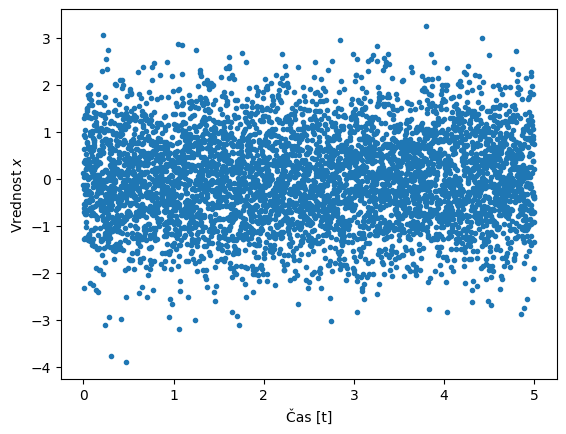

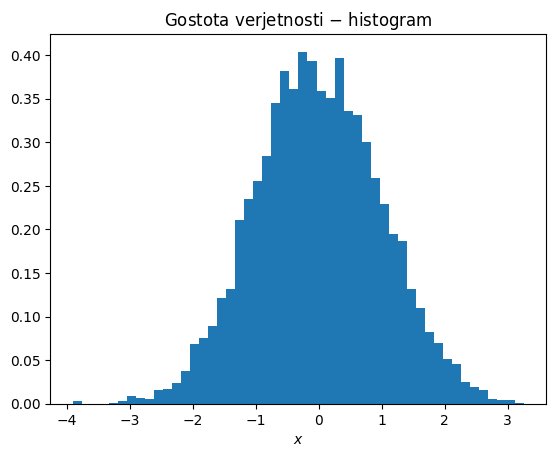

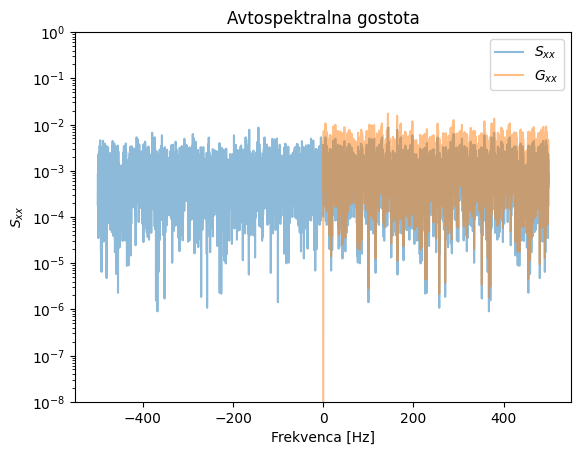

Integral v času:  0.9904720416233659 , integral PSD (Sxx):  0.9906062124167658 , integral PSD (Gxx):  0.990830770222994 , integral PSD (Gxx) Welch:  0.9907922407740426


In [7]:
import numpy as np
from scipy.signal import welch 
import matplotlib.pyplot as plt

rng = np.random.default_rng(0)
N = 5000
fs = 1000
dt = 1./fs
x = rng.normal(size=N)
time = np.arange(N)*dt
T = dt*N
plt.plot(time, x, '.')
plt.xlabel('Čas [t]')
plt.ylabel('Vrednost $x$')
plt.show()

plt.title('Gostota verjetnosti $-$ histogram')
plt.xlabel('$x$')
plt.hist(x, bins=50, density=True)
plt.show()

X = np.fft.fft(x)/N
freq = np.fft.fftfreq(N, d=dt)
scale = 1.0 * N / fs # skaliranje na gostoto
Sxx = X.conj()*X * scale

X_r = np.fft.rfft(x)/N
freq_r = np.fft.rfftfreq(N, d=dt)
Gxx = 2*X_r.conj()*X_r * scale

# alternativen izračun prek Scipy (tako se dejansko dela pozneje)
freq2, Gxx2 = welch(x, window=np.ones_like(x), fs=fs)

plt.title('Avtospektralna gostota')
plt.semilogy(freq, np.abs(Sxx), alpha=0.5, label='$S_{xx}$')
plt.semilogy(freq2, np.abs(Gxx2), alpha=0.5, label='$G_{xx}$')
plt.ylim(1e-8,1e0)
plt.legend()
plt.xlabel('Frekvenca [Hz]')
plt.ylabel('$S_{xx}$')
plt.show()

print('Integral v času: ', np.trapz(x*x, dx=dt)/(N/fs), 
      ', integral PSD (Sxx): ', np.trapz(np.real(Sxx), dx=1/(N/fs)), 
      ', integral PSD (Gxx): ', np.trapz(np.real(Gxx), dx=1/(N/fs)),
      ', integral PSD (Gxx) Welch: ', np.trapz(np.real(Gxx2), dx=1/(N/fs)))

Pogledamo lahko tudi izračun variance z vgrajeno `numpy.var()` metodo:

In [8]:
np.var(x)

0.9908102289544899

### Zgled 2

Poglejmo si sedaj zgled in najprej izračunajmo varianco s pomočjo definicije normalne porazdelitve z ničelno srednjo vrednostjo $\mu=0$ in standardno deviacijo $\sigma=3$:

$$
\sigma_x^2 = E \left[x^2(t)\right] = \int_{-\infty}^{+\infty} x^2 \, p(x)\, \textrm{d} x.
$$


In [9]:
import sympy as sym
σ, μ, x, = sym.symbols('\\sigma, \\mu, x', real=True, positive=True)
π = sym.pi

p = 1/(σ*sym.sqrt(2*π)) * sym.exp(-(x-μ)**2/(2*σ**2))

podatki = {σ: 3., μ: 0.}

sym.integrate(x**2*p, (x, -sym.oo, +sym.oo)).subs(podatki)

9.00000000000000

Pridobili smo pričakovano vrednost $\sigma^2=9$. Nadaljujemo z integriranjem časovne vrste v času:

$$
\sigma_x^2 = \lim_{T \to \infty} \frac{1}{T} \int_{0}^{T} x^2(t)\,\textrm{d} t.
$$


In [10]:
import numpy as np

σ = 3
rng = np.random.default_rng(0)
N = 1_000_000
T = 10
time,  dt = np.linspace(0, T, N, retstep=True)
fs = 1/dt
x = rng.normal(scale=σ, size=N)

np.trapz(x**2, dx=dt)/T

9.01211481059612

Ker gre za numerične podatke, smo pridobili vrednost, ki je bolj ali manj blizu pričakovani vrednosti $\sigma^2=9$ (poskusite spremeniti `N`). Nadaljujemo z izračunom variance v frekvenčni domeni:

$$
\sigma_x^2 = \int_{-\infty}^{+\infty} S_{xx}(f)\,\textrm{d} f.
$$


Ali z uporabo enostranskega amplitudnega spektra:

In [11]:
np.sum(Gxx)*fs*N

(495443148482.55273+2.602019554625279e-09j)

In [12]:
X = np.fft.fft(x)/N
scale = 1/(fs*N)
Sxx = np.real(X.conj()*X) * scale
np.sum(Sxx)*fs*N

9.012106104865358

In [13]:
X_r = np.fft.rfft(x)/N
scale = 1/(fs*N)
Gxx = np.real(X_r.conj()*X_r) * scale
Gxx[1:] = 2*Gxx[1:]

## Spektralni momenti

Iz definicije PSD sledi, da je površina pod krivuljo enaka pričakovani kvadratni vrednosti $E[x^2]$ procesa (glejte poglavje {ref}`sec:parseval`):

$$
m_0 = E \left[x^2(t)\right] = \int_{-\infty}^{+\infty} S_{xx}(\omega)\, \textrm{d} \omega,
$$

kjer je $m_0$ ničelni spektralni moment enak varianci $\sigma_x^2$ procesa ničelne srednje vrednosti. Višji sodi momenti ustrezajo varianci časovnih odvodov prvotnega naključnega procesa:

$$
m_2 = E \left[\dot{x}^2(t)\right] = \int_{-\infty}^{+\infty} \omega^2 \, S_{xx}(\omega) \,\textrm{d} \omega.
$$

Splošni izraz za $i$-ti spektralni moment $m_i$ lahko zapišemo v obliki:

$$
m_i = \int_{-\infty}^{+\infty} \omega^i \, S_{xx}(\omega) \textrm{d} \omega=\int_{0}^{+\infty} \omega ^i \, G_{xx}(\omega) \,\textrm{d} \omega,
$$

kjer je $G_{xx}$ enostranski PSD. 

Treba je poudariti, da moramo $-$ če je PSD podan v Hz ($G_{xx}(f)$) $-$ paziti na pravilno uporabo ročice $(2\pi\,f)^i$:

$$
m_i = \int_{0}^{+\infty} (2\pi\,f)^i \, G_{xx}(f) \,\textrm{d} f.
$$

### Zgled

Ponovno si poglejmo zgled; najprej definirajmo harmonski odziv z amplitudo $A=1$. Varianca pomika je pričakovana: $(A/\sqrt{2})^2=0.5\,A$, varianca hitrosti pa: $((2\pi\,f_0\,A)/\sqrt{2})^2=2\pi^2\,f_0^2\,A$ in varianca pospeška: $(((2\pi\,f_0)^2\,A)/\sqrt{2})^2=2^3(\pi\,f_0)^4\,A$.

0.5000000000000002

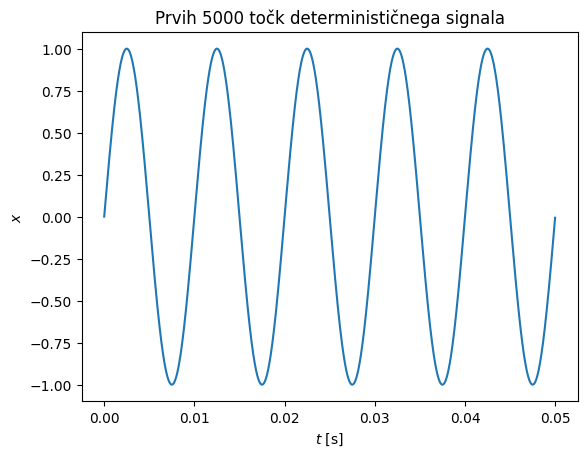

In [14]:
import numpy as np
import matplotlib.pyplot as plt

N = 1_000_000
T = 10
f_0 = 100
time,  dt = np.linspace(0, T, N, retstep=True)
x = np.sin(2*np.pi*f_0*time)
X = np.fft.rfft(x)/N
freq = np.fft.rfftfreq(N, dt)

plt.title('Prvih 5000 točk determinističnega signala')
plt.plot(time[:5000], x[:5000])
plt.xlabel('$t$ [s]')
plt.ylabel('$x$')

np.trapz(x**2, dx=dt)/T

Definirajmo funkcijo spektralnih momentov:

In [15]:
def spektralni_moment(X_r, freq, i=0):
    # scale tukaj ne uporabimo, ker se pokrajša
    Gxx = X_r.conj()*X_r
    Gxx[1:] = 2*Gxx[1:]
    return np.real(np.sum((2*np.pi*freq)**i * Gxx))

Spektralni moment $m_0$ (pomik): preverimo, ali res dobimo pričakovano vrednost ($0.5\,A=0.5$) tudi v frekvenčni domeni:

In [16]:
spektralni_moment(X_r=X, freq=freq, i=0)

0.49999950000000015

Spektralni moment $m_2$ (hitrost): za hitrost pričakujemo vrednost $2\,\pi^2\,f_0^2\,A=197392.08$:

In [17]:
spektralni_moment(X_r=X, freq=freq, i=2)

197392.0431335743

Ali v času:

In [18]:
v = np.gradient(x)/dt
np.trapz(v**2, dx=dt)/T

197389.49045450424

Spektralni moment $m_4$ (pospešek): za pospešek pričakujemo $2^3(\pi\,f_0)^4\,A=77927272827.2$:

In [19]:
spektralni_moment(X_r=X, freq=freq, i=4)

100537876580.76161

Ali v času:

In [20]:
a = np.gradient(v)/dt
np.trapz(a**2, dx=dt)/T

77925221885.31581

Opazimo že relativno veliko odstopanje, razlog je v numerični napaki. Amplitudni spekter $X$ ima zunaj $f_0$ teoretično vrednost 0, dejansko vrednost pa blizu 0; ker izraz za izračun četrtega spektralnega momenta visoke frekvence zelo poudari ($(2\pi\,f)^4$), se poudari tudi numerična napaka. Boljši rezultat pridobimo, če se npr. frekvenčno omejimo:

In [21]:
sel = np.logical_and(freq>=(f_0-1),freq<=(f_0+1))
spektralni_moment(X_r=X[sel], freq=freq[sel], i=4)

77926867176.11661